In [1]:
pip install -U ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.1/910.1 kB 13.3 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip uninstall -y wandb


In [3]:
import os
import shutil
import random

# Paths to your validation data
valid_image_dirs = [
    '/kaggle/input/rotten-a/Copy of fresh apple-20241020T150548Z-001/Copy of fresh apple/valid/images',
    '/kaggle/input/rotten-a/Copy of fresh banana-20241020T151303Z-001/Copy of fresh banana/valid/images',
    '/kaggle/input/rotten-a/Copy of fresh oranges-20241020T150611Z-001/Copy of fresh oranges/valid/images',
    '/kaggle/input/rotten-a/Copy of rotten apple-20241020T150623Z-001/Copy of rotten apple/valid/images',
    '/kaggle/input/rotten-a/Copy of rotten banana-20241020T151529Z-001/Copy of rotten banana/valid/images',
    '/kaggle/input/rotten-a/Copy of rotten oranges-20241020T150629Z-001/Copy of rotten oranges/valid/images'
]

valid_label_dirs = [
    '/kaggle/input/rotten-a/Copy of fresh apple-20241020T150548Z-001/Copy of fresh apple/valid/labels',
    '/kaggle/input/rotten-a/Copy of fresh banana-20241020T151303Z-001/Copy of fresh banana/valid/labels',
    '/kaggle/input/rotten-a/Copy of fresh oranges-20241020T150611Z-001/Copy of fresh oranges/valid/labels',
    '/kaggle/input/rotten-a/Copy of rotten apple-20241020T150623Z-001/Copy of rotten apple/valid/labels',
    '/kaggle/input/rotten-a/Copy of rotten banana-20241020T151529Z-001/Copy of rotten banana/valid/labels',
    '/kaggle/input/rotten-a/Copy of rotten oranges-20241020T150629Z-001/Copy of rotten oranges/valid/labels'
]

# Define paths for training and validation sets
train_images_path = '/kaggle/working/train/images'
train_labels_path = '/kaggle/working/train/labels'
val_images_path = '/kaggle/working/val/images'
val_labels_path = '/kaggle/working/val/labels'

# Create directories for training and validation sets
os.makedirs(train_images_path, exist_ok=True)
os.makedirs(train_labels_path, exist_ok=True)
os.makedirs(val_images_path, exist_ok=True)
os.makedirs(val_labels_path, exist_ok=True)

# Collect all image and label files
image_files = []
label_files = []

for valid_image_dir, valid_label_dir in zip(valid_image_dirs, valid_label_dirs):
    # Check if directories exist
    if os.path.exists(valid_image_dir) and os.path.exists(valid_label_dir):
        images = [f for f in os.listdir(valid_image_dir) if f.endswith('.jpg')]
        labels = [f for f in os.listdir(valid_label_dir) if f.endswith('.txt')]
        image_files.extend(images)
        label_files.extend(labels)

# Ensure we have image-label pairs
image_label_pairs = [(img, img.replace('.jpg', '.txt')) for img in image_files if img.replace('.jpg', '.txt') in label_files]

# Set a random seed for reproducibility
random.seed(42)

# Shuffle and split the data
random.shuffle(image_label_pairs)
split_ratio = 0.8  # 80% for training, 20% for validation
split_index = int(len(image_label_pairs) * split_ratio)

# Copy files to training and validation directories
for i, (image_file, label_file) in enumerate(image_label_pairs):
    for valid_image_dir, valid_label_dir in zip(valid_image_dirs, valid_label_dirs):
        # Copy to training set
        if i < split_index:
            image_source = os.path.join(valid_image_dir, image_file)
            label_source = os.path.join(valid_label_dir, label_file)
            # Check if the files exist before copying
            if os.path.exists(image_source) and os.path.exists(label_source):
                shutil.copy(image_source, train_images_path)
                shutil.copy(label_source, train_labels_path)
        else:
            # Copy to validation set
            image_source = os.path.join(valid_image_dir, image_file)
            label_source = os.path.join(valid_label_dir, label_file)
            # Check if the files exist before copying
            if os.path.exists(image_source) and os.path.exists(label_source):
                shutil.copy(image_source, val_images_path)
                shutil.copy(label_source, val_labels_path)

# The data split into training and validation sets is completed without print statements.


In [4]:
!pip install ultralytics



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [5]:
# Create the YAML configuration file
yaml_content = """train: /kaggle/working/train/images
val: /kaggle/working/val/images

nc: 6
names: ['fresh apple', 'fresh banana', 'fresh oranges', 'rotten apple', 'rotten banana', 'rotten oranges']
"""

# Write the content to a .yaml file
yaml_file_path = '/kaggle/working/yolov8_dataset.yaml'
with open(yaml_file_path, 'w') as file:
    file.write(yaml_content)

print(f"YAML file created at: {yaml_file_path}")


YAML file created at: /kaggle/working/yolov8_dataset.yaml


In [6]:
from ultralytics import YOLO

# Load the YOLOv8 model (using the YOLOv8n model)
model = YOLO('yolov8n.yaml')  # You can replace with your preferred model

# Train the model
results = model.train(data=yaml_file_path, epochs=5, imgsz=640, batch=16)  # Adjust epochs and batch size as necessary

# Save the trained model
model.save('/kaggle/working/yolov8_trained_model.pt')

print("Training completed and model saved!")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.62 🚀 Python-3.10.15 torch-2.4.0+cu121 CPU (Intel Xeon 2.00GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/kaggle/working/yolov8_dataset.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, m

100%|██████████| 755k/755k [00:00<00:00, 16.2MB/s]
E0000 00:00:1737052558.400741      13 common_lib.cc:798] Could not set metric server port: INVALID_ARGUMENT: Could not find SliceBuilder port 8471 in any of the 0 ports provided in `tpu_process_addresses`="local"
=== Source Location Trace: ===
learning/45eac/tfrc/runtime/common_lib.cc:479
D0116 18:35:58.408948229      13 config.cc:196]                        gRPC EXPERIMENT call_status_override_on_cancellation   OFF (default:OFF)
D0116 18:35:58.408964407      13 config.cc:196]                        gRPC EXPERIMENT call_v3                                OFF (default:OFF)
D0116 18:35:58.408968017      13 config.cc:196]                        gRPC EXPERIMENT canary_client_privacy                  ON  (default:ON)
D0116 18:35:58.408970837      13 config.cc:196]                        gRPC EXPERIMENT capture_base_context                   ON  (default:ON)
D0116 18:35:58.408973722      13 config.cc:196]                        gRPC EXPERIMEN

Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /kaggle/working/train/labels... 8316 images, 651 backgrounds, 0 corrupt: 100%|██████████| 8316/8316 [00:07<00:00, 1178.25it/s]


train: New cache created: /kaggle/working/train/labels.cache


/usr/local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 2.0.0 (you have 1.4.17). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /kaggle/working/val/labels... 2079 images, 163 backgrounds, 0 corrupt: 100%|██████████| 2079/2079 [00:01<00:00, 1230.84it/s]


val: New cache created: /kaggle/working/val/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G      2.137      3.301      3.046         32        640: 100%|██████████| 520/520 [14:26<00:00,  1.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [01:54<00:00,  1.76s/it]


                   all       2079       2127      0.269      0.642      0.349      0.241

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G      1.102      2.023      1.764         31        640: 100%|██████████| 520/520 [14:22<00:00,  1.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [01:32<00:00,  1.42s/it]

                   all       2079       2127      0.568      0.645      0.607      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G     0.8843      1.525       1.52         29        640: 100%|██████████| 520/520 [14:19<00:00,  1.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [01:24<00:00,  1.31s/it]

                   all       2079       2127       0.62      0.691      0.699       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G     0.7647      1.298      1.407         28        640: 100%|██████████| 520/520 [14:26<00:00,  1.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [01:29<00:00,  1.37s/it]

                   all       2079       2127      0.752        0.8      0.805        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G     0.6792      1.126      1.338         38        640: 100%|██████████| 520/520 [15:25<00:00,  1.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [01:33<00:00,  1.44s/it]

                   all       2079       2127      0.775      0.776       0.84      0.747



5 epochs completed in 1.351 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.62 🚀 Python-3.10.15 torch-2.4.0+cu121 CPU (Intel Xeon 2.00GHz)
YOLOv8n summary (fused): 168 layers, 3,006,818 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [01:17<00:00,  1.19s/it]


                   all       2079       2127      0.775      0.776      0.841      0.748
           fresh apple        286        291      0.889      0.857      0.923      0.897
          fresh banana        246        305      0.722      0.715      0.743      0.572
         fresh oranges        284        353       0.61      0.858      0.869      0.817
          rotten apple        470        475      0.797      0.912      0.917        0.9
         rotten banana        392        436      0.736      0.734      0.766       0.54
        rotten oranges        238        267      0.896      0.578      0.825      0.761
Speed: 0.4ms preprocess, 32.1ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs/detect/train
Training completed and model saved!


In [8]:
import os
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO



# Define the image path
image_path = '/kaggle/input/rotten-images/rotten_images/rotated_by_15_Screen-Shot-2018-06-08-at-2-30-26-PM_png.rf.4d60aa4d840f2773dedc7586efa56d2c.jpg'

# Check if the image file exists
if not os.path.exists(image_path):
    raise FileNotFoundError(f"Image file not found: {image_path}")

# Run inference on the image
results = model.predict(source=image_path)

# Read the image for drawing
image = cv2.imread(image_path)

# Define the class names
class_names = ['fresh apple', 'fresh banana', 'fresh oranges', 'rotten apple', 'rotten banana', 'rotten oranges']

# Show results
for result in results:
    boxes = result.boxes  # Bounding box predictions
    for box in boxes:
        # Get the box coordinates and class
        x1, y1, x2, y2 = box.xyxy[0]  # Box coordinates
        confidence = box.conf[0]  # Confidence score
        class_id = int(box.cls[0])  # Class ID

        # Map the class ID to the class name
        class_name = class_names[class_id]

        # Draw bounding boxes on the image
        cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)  # Green box
        # Increase the font size by changing the scale
        cv2.putText(image, f'{class_name}, Conf: {confidence:.2f}', 
                    (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 2)

# Convert BGR image (OpenCV format) to RGB format (Matplotlib format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the output image using Matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis('off')  # Turn off axis numbers and ticks
plt.title("Detection Results")

plt.show()



image 1/1 /kaggle/input/rotten-images/rotten_images/rotated_by_15_Screen-Shot-2018-06-08-at-2-30-26-PM_png.rf.4d60aa4d840f2773dedc7586efa56d2c.jpg: 640x640 1 fresh oranges, 52.4ms
Speed: 2.0ms preprocess, 52.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


<Figure size 1000x1000 with 1 Axes>


image 1/1 /kaggle/input/rotten-images/rotten_images/rotated_by_15_Screen-Shot-2018-06-08-at-2-29-55-PM_png.rf.fc32cd4f052ebdf19f525d3f654eb2f2.jpg: 640x640 1 rotten apple, 53.3ms
Speed: 1.8ms preprocess, 53.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


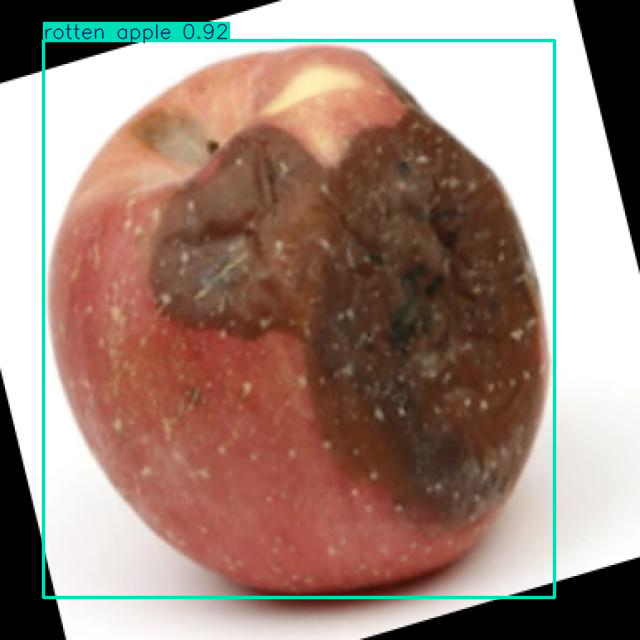

Inference completed!


In [9]:
from ultralytics import YOLO

# Load the trained model (e.g., best.pt or last.pt)
model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')  # Replace with your actual path, e.g., runs/train/exp/weights/best.pt

# Run inference on a single image
results = model.predict(source='/kaggle/input/rotten-images/rotten_images/rotated_by_15_Screen-Shot-2018-06-08-at-2-29-55-PM_png.rf.fc32cd4f052ebdf19f525d3f654eb2f2.jpg', save=True, imgsz=640)

# # Run inference on a directory of images
# results = model.predict(source='/path/to/images_directory', save=True, imgsz=640)

# Display predictions
for result in results:
    result.show()

print("Inference completed!")
